In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
df_40 = pd.read_csv("45.csv")
df_80 = pd.read_csv("90.csv")
df_120 = pd.read_csv("120.csv")

In [ ]:
df_40.head()

,t (s),V (mV)
0,0.000,21.6638
1,0.999,21.5494
2,2.000,21.4497
3,2.999,21.3544
4,3.999,21.2561


In [ ]:
df_40.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t (s)   153 non-null    float64
 1   V (mV)  153 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [ ]:
df_80.head()

,t (s),V (mV)
0,0.000,19.1256
1,1.050,19.0929
2,2.100,19.0398
3,3.113,19.0031
4,4.113,18.9608


In [ ]:
df_80.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t (s)   251 non-null    float64
 1   V (mV)  251 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB


In [ ]:
df_120.head()

,t (s),V (mV)
0,0.000,20.0650
1,1.049,20.0307
2,2.061,20.0048
3,3.062,19.9682
4,4.062,19.9280


In [ ]:
df_120.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t (s)   311 non-null    float64
 1   V (mV)  311 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


# Восстанавливаем прямые по данным

In [ ]:
log_u_40  = np.log(df_40.iloc[:,1 ].to_numpy())
t_40      = df_40.iloc[:,0].to_numpy()

log_u_80  = np.log(df_80.iloc[:,1 ].to_numpy())
t_80      = df_80.iloc[:,0].to_numpy()

log_u_120 = np.log(df_120.iloc[:,1].to_numpy())
t_120     = df_120.iloc[:,0].to_numpy()

model_40   = LinearRegression().fit (t_40.reshape(-1, 1),  log_u_40)
model_80   = LinearRegression().fit (t_80.reshape(-1, 1),  log_u_80)
model_120  = LinearRegression().fit (t_120.reshape(-1, 1), log_u_120)


In [ ]:
B_40, A_40 = model_40.coef_[0], np.exp(model_40.intercept_)
B_80, A_80 = model_80.coef_[0], np.exp(model_80.intercept_)
B_120, A_120 = model_120.coef_[0], np.exp(model_120.intercept_)

(21.75230409817387, -0.005112726194512606)

In [ ]:
X_data = np.arange (0, 300, 1)
log_Y_40_data  = model_40.predict  (X_data.reshape(-1, 1))
log_Y_80_data  = model_80.predict  (X_data.reshape(-1, 1))
log_Y_120_data = model_120.predict (X_data.reshape(-1, 1))

# Строим график U(t) в логарифмическом масштабе по оси ординат

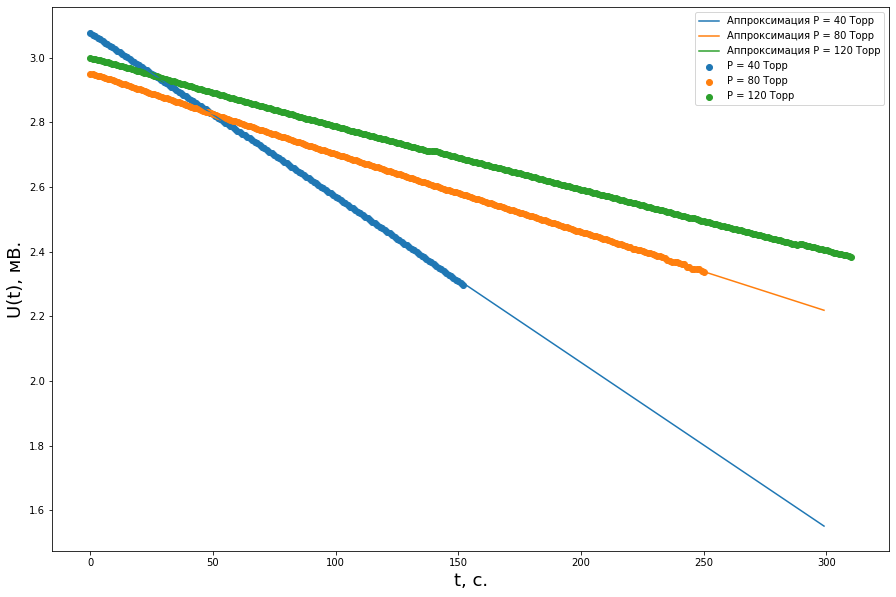

In [ ]:
fig = plt.figure (figsize=(15,10))
plt.scatter (df_40.iloc[:,0],  np.log(df_40.iloc[:,1 ].to_numpy()), label="P = 40 Торр")
plt.scatter (df_80.iloc[:,0],  np.log(df_80.iloc[:,1 ].to_numpy()), label="P = 80 Торр")
plt.scatter (df_120.iloc[:,0], np.log(df_120.iloc[:,1].to_numpy()), label="P = 120 Торр")

plt.plot (X_data, log_Y_40_data,  label="Аппроксимация P = 40 Торр")
plt.plot (X_data, log_Y_80_data,  label="Аппроксимация P = 80 Торр")
plt.plot (X_data, log_Y_120_data, label="Аппроксимация P = 120 Торр")

plt.xlabel ("t, c.",     fontdict={"fontsize": 18})
plt.ylabel ("U(t), мВ.", fontdict={"fontsize": 18})
plt.legend()
plt.savefig("U(t)_graph.png")
plt.show()

# Считаем погрешность

In [207]:
def count_std_der (model, log_u, t):
    std = 1 - model.score(t.reshape(-1, 1), log_u)

    return std

In [208]:
sigm_B_40 = count_std_der (model_40, log_u_40, t_40)
B_40, sigm_B_40

(-0.005112726194512606, 8.107209492835832e-05)

In [209]:
sigm_B_80 = count_std_der (model_80, log_u_80, t_80)
B_80, sigm_B_80

(-0.002439553275729382, 0.00012553896568712197)

In [210]:
sigm_B_120 = count_std_der (model_120, log_u_120, t_120)
B_120, sigm_B_120

(-0.0019823446189485266, 0.0005641124200580494)

In [215]:
def count_tau (B):
    return -B ** (-1)

def count_sigm_tau (B, sigm_B):
    tau = count_tau (B)
    sigm_tau = sigm_B / np.abs(B)
    return sigm_tau

In [222]:
tau_40 = count_tau (B_40) 
count_tau (B_40), count_sigm_tau (B_40, sigm_B_40)

(195.59036841700643, 0.015856920915376122)

In [223]:
tau_80 = count_tau (B_80)
count_tau (B_80), count_sigm_tau (B_80, sigm_B_80)

(409.9111136242836, 0.05145981722804889)

In [224]:
tau_120 = count_tau (B_120)
count_tau (B_120), count_sigm_tau (B_120, sigm_B_120)

(504.45315634897986, 0.2845682908339446)

In [219]:
V = 420

In [220]:
L_over_S = 9

In [221]:
count_D = lambda tau: V * L_over_S / 2 / tau

In [228]:
D = count_D (tau_40), count_D (tau_80), count_D (tau_120)
D

(9.663052507628827, 4.610755691128532, 3.746631329812715)

In [234]:
one_over_p = []
for idx, p in enumerate([40, 80, 120]):
    one_over_p.append(1/p)
    print (1 / p * 10**3, D[idx])

one_over_p = np.array(one_over_p)

25.0 9.663052507628827
12.5 4.610755691128532
8.333333333333334 3.746631329812715


In [235]:
model = LinearRegression().fit(one_over_p.reshape(-1, 1), D)

In [236]:
X_data = np.arange (0.0075, 0.0255, 0.0005)
Y_data = model.predict (X_data.reshape(-1, 1))

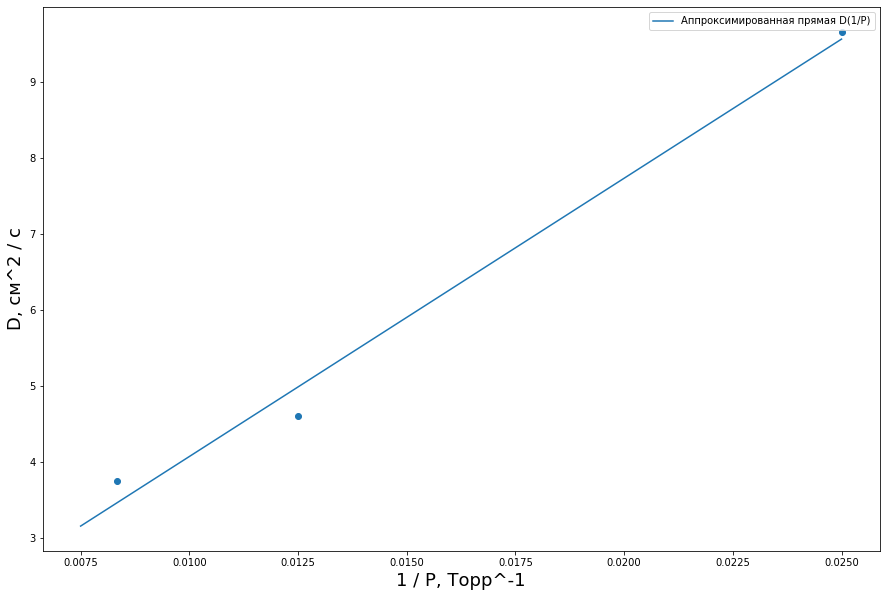

In [247]:
fig = plt.figure(figsize=(15, 10))
plt.scatter (one_over_p, D)
plt.plot (X_data, Y_data, label="Аппроксимированная прямая D(1/P)")
plt.xlabel("1 / P, Торр^-1", fontdict={"fontsize": 18})
plt.ylabel("D, см^2 / c"   , fontdict={"fontsize": 18})
plt.legend()

plt.savefig("D_from_one_over_p_graph.png")
plt.show()

In [248]:
model.coef_

array([366.33876482])

In [257]:
D_air = model.predict (np.array([1 / 760]).reshape(1, -1))[0]
D_air

0.8919956264481232

In [258]:
3 * D_air * np.sqrt (8 * 8.31 * 295 / 3.14 / 4)

105.74155029564835

In [259]:
7.1 / 105.74

0.06714582939285038